<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файл" data-toc-modified-id="Откроем-и-изучим-файл-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откроем и изучим файл</a></span></li><li><span><a href="#Разобьем-данные-на-выборки" data-toc-modified-id="Разобьем-данные-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разобьем данные на выборки</a></span></li><li><span><a href="#Исследуем-модели" data-toc-modified-id="Исследуем-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследуем модели</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-модель-для-классификации-деревом-решений" data-toc-modified-id="DecisionTreeClassifier-модель-для-классификации-деревом-решений-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier модель для классификации деревом решений</a></span></li><li><span><a href="#RandomForestClassifier-модель-для-классификации-алгоритмом-случайного-леса" data-toc-modified-id="RandomForestClassifier-модель-для-классификации-алгоритмом-случайного-леса-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>RandomForestClassifier модель для классификации алгоритмом случайного леса</a></span></li><li><span><a href="#Модель-LogisticRegression---логистическая-регрессия" data-toc-modified-id="Модель-LogisticRegression---логистическая-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель LogisticRegression - логистическая регрессия</a></span></li></ul></li><li><span><a href="#Проверим-модель-на-тестовой-выборке" data-toc-modified-id="Проверим-модель-на-тестовой-выборке-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверим модель на тестовой выборке</a></span></li><li><span><a href="#Проверим-модели-на-адекватность" data-toc-modified-id="Проверим-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверим модели на адекватность</a></span></li></ul></div>

# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Мы построим модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — она уже сделана.


## Откроем и изучим файл

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error
from joblib import dump
import time 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
try:
    df = pd.read_csv('D:\\Мои документы\\DS\\users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head(20)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

Предобработка данных не понадобится — она уже сделана.

## Разобьем данные на выборки

Тестовой выборки нет. Значит, данные нужно разбить на три части: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разбиваем в соотношении 3:1:1. В процентах 60:20:20

In [5]:
features = df.drop(['is_ultra'], axis=1) # извлекаем признаки
target = df['is_ultra']  # извлекаем целевой признак

features_train, features_valid, target_train, target_valid, = train_test_split(
    features, target, test_size=0.40, random_state=12345)# отделим 60% данных для обучающей выборки
features_valid, features_test, target_valid,target_test = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=12345)# разделим поровну (по 20% от данных) для валидационной и тестовой выборки

In [6]:
print('размер обучающей выборки:',features_train.shape)
print('размер валидационной выборки:',features_valid.shape)
print('размер тестовой выборки:',features_test.shape)

размер обучающей выборки: (1928, 4)
размер валидационной выборки: (643, 4)
размер тестовой выборки: (643, 4)


## Исследуем модели

### DecisionTreeClassifier модель для классификации деревом решений

Подбор параметров – одна из важных задач для построения модели машинного обучения. Изменение параметров модели может принципиально повлиять на ее качество. Например,если сделать гиперпараметр n_estimators больше, модель начнёт разрастаться и медленно обучаться. Это плохо, модель может переобучиться. Мало деревьев и результаты не лучше — тоже неудачно. Перебор этих параметров вручную может занять колоссальное количество времени. Однако, существует модуль GridSearchCV. GridSearchCV находит наилучшие параметры, путем обычного перебора: он создает модель для каждой возможной комбинации параметров.

In [7]:
parametrs={'min_samples_split':range (2,8),'max_depth': range (1,10), 'min_samples_leaf':range (1,10)} #создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. 

In [8]:
start = time.time() ## точка отсчета времени

##код программы

# обучите модель вызовом метода fit()

model_tree = DecisionTreeClassifier(random_state=12345) #Запускаем обучение
tree_search=GridSearchCV(model_tree, parametrs, cv=5)
tree_search.fit(features_train, target_train) 
predictions=tree_search.predict(features_valid)
accuracy = tree_search.score(features_valid, target_valid)

print("Accuracy наилучшей модели на валидационной выборке:", accuracy)
end = time.time() - start ##  время работы программы
print('Время работы модели:', end)

Accuracy наилучшей модели на валидационной выборке: 0.7822706065318819
Время работы модели: 11.121256351470947


In [9]:
print('Лучший результат у модели при параметрах', tree_search.best_params_) #Полученные параметры являются лучшими для нашей модели.

Лучший результат у модели при параметрах {'max_depth': 7, 'min_samples_leaf': 9, 'min_samples_split': 2}


In [10]:
tree = pd.DataFrame(tree_search.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
tree=tree[['mean_test_score', 'param_max_depth','param_min_samples_leaf', 'param_min_samples_split']]

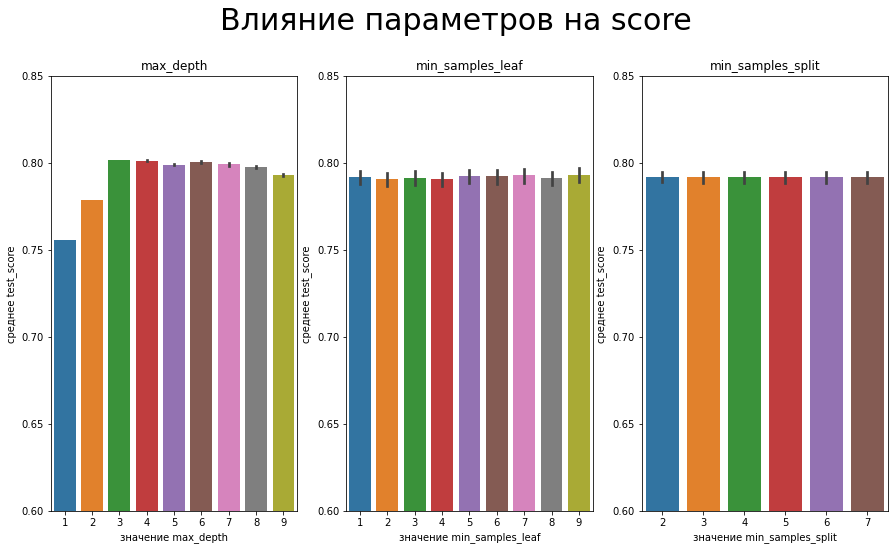

In [44]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1)
plt.ylim([0.6, 0.85])
sns.barplot(x='param_max_depth', y="mean_test_score",data=tree)
plt.xlabel('значение max_depth')
plt.ylabel('среднее test_score')
plt.title('max_depth')

plt.subplot(1, 3, 2)
plt.ylim([0.6, 0.85])
sns.barplot(x='param_min_samples_leaf', y="mean_test_score",data=tree)
plt.xlabel('значение min_samples_leaf')
plt.ylabel('среднее test_score')
plt.title('min_samples_leaf')

plt.subplot(1, 3, 3)
plt.ylim([0.6, 0.85])
sns.barplot(x='param_min_samples_split', y="mean_test_score",data=tree)
plt.xlabel('значение min_samples_split')
plt.ylabel('среднее test_score')
plt.title('min_samples_split')
plt.suptitle('Влияние параметров на score',y = 1,fontsize = 30)
plt.show()

На результат оказывают влияние параметры max_depth

### RandomForestClassifier модель для классификации алгоритмом случайного леса

In [12]:
parametrs = { 'n_estimators': range (10, 51, 10), 'max_depth': range (1,13, 2), 'min_samples_leaf': range (1,8), 'min_samples_split': range (2,10,2),'max_features': ['log2', 'sqrt'] }
#создаем словарик, в который вписываем параметры, которые будем прогонять GridSearch’ем. 

In [13]:
start = time.time()
model_random = RandomForestClassifier(random_state=12345) #Запускаем обучение
grid_search=GridSearchCV(model_random, parametrs, cv=5)
grid_search.fit(features_train, target_train) 

print("Accuracy наилучшей модели на валидационной выборке:", grid_search.score(features_valid,target_valid))

end = time.time() - start 
print('Время работы модели:', end)

Accuracy наилучшей модели на валидационной выборке: 0.7978227060653188
Время работы модели: 395.86732363700867


In [14]:
print('Лучший результат у модели при параметрах', grid_search.best_params_ )

Лучший результат у модели при параметрах {'max_depth': 9, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 30}


Теперь создадим столбчатые графики, на которых, по оси Х, расположены значения гиперпараметров, а по оси Y — средние значения, показываемые моделями. Это позволит понять то, какие значения гиперпараметров, в среднем, лучше всего себя показывают.

In [15]:
rs_df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)

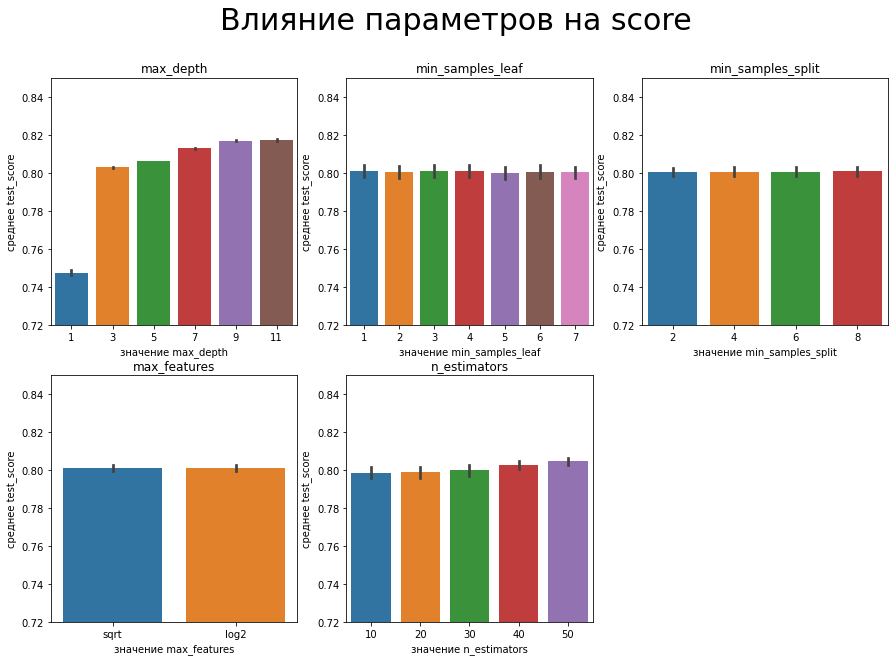

In [45]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.ylim([.72,.85])
sns.barplot(x='param_max_depth', y="mean_test_score",data=rs_df)
plt.xlabel('значение max_depth')
plt.ylabel('среднее test_score')
plt.title('max_depth')

plt.subplot(2, 3, 2)
plt.ylim([0.72, 0.85])
sns.barplot(x='param_min_samples_leaf', y="mean_test_score",data=rs_df)
plt.xlabel('значение min_samples_leaf')
plt.ylabel('среднее test_score')
plt.title('min_samples_leaf')

plt.subplot(2, 3, 3)
plt.ylim([0.72, 0.85])
sns.barplot(x='param_min_samples_split', y="mean_test_score",data=rs_df)
plt.xlabel('значение min_samples_split')
plt.ylabel('среднее test_score')
plt.title('min_samples_split')

plt.subplot(2, 3, 4)
plt.ylim([0.72, 0.85])
sns.barplot(x='param_max_features', y="mean_test_score",data=rs_df)
plt.xlabel('значение max_features')
plt.ylabel('среднее test_score')
plt.title('max_features')

plt.subplot(2, 3, 5)
plt.ylim([0.72, 0.85])
sns.barplot(x='param_n_estimators', y="mean_test_score",data=rs_df)
plt.xlabel('значение n_estimators')
plt.ylabel('среднее test_score')
plt.title('n_estimators')

plt.suptitle('Влияние параметров на score',y = 0.98,fontsize = 30)
plt.show()

На результат оказывают влияние параметры n_estimators и max_depth

Алгоритмы не ограничиваются деревьями. Есть и другие способы классификации.

### Модель LogisticRegression - логистическая регрессия

In [17]:
start = time.time()
param_lr = {
    'max_iter': [20, 50, 100, 200, 500, 1000],                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],   
    'class_weight': ['balanced'] 
}
model_Logistic = GridSearchCV(estimator=LogisticRegression(random_state=1234), param_grid=param_lr, verbose=1, cv=10, n_jobs=-1)
model_Logistic.fit(features_train, target_train)
model_Logistic.predict(features_valid) 
print("Accuracy модели на валидационной выборке:", model_Logistic.score(features_valid, target_valid) )

dump(model_Logistic, 'model_9_1.joblib')

end = time.time() - start 
print('Время работы модели:', end)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Accuracy модели на валидационной выборке: 0.6174183514774495
Время работы модели: 3.8855888843536377


In [18]:
print(model_Logistic.best_params_ )

{'class_weight': 'balanced', 'max_iter': 100, 'solver': 'newton-cg'}


In [19]:
logistic = pd.DataFrame(model_Logistic.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
logistic=logistic[['mean_test_score', 'param_max_iter','param_solver']]

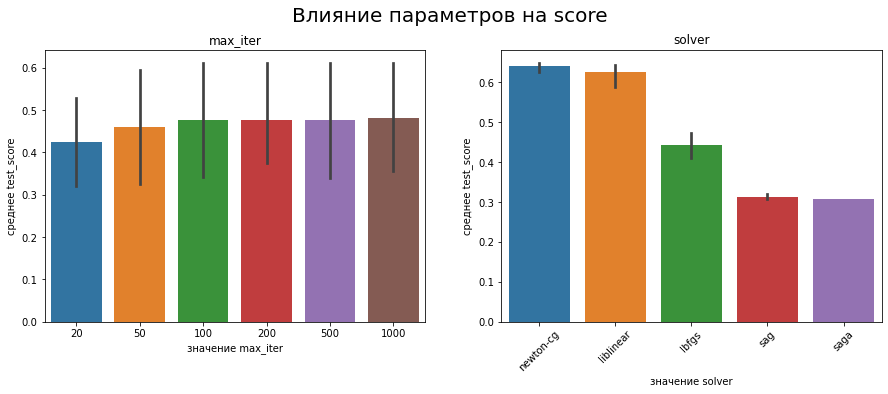

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='param_max_iter', y="mean_test_score",data=logistic)
plt.xlabel('значение max_iter')
plt.ylabel('среднее test_score')
plt.title('max_iter')
plt.subplot(1, 2, 2)
plt.xticks(rotation=45)
sns.barplot(x='param_solver', y="mean_test_score",data=logistic)
plt.xlabel('значение solver')
plt.ylabel('среднее test_score')
plt.title('solver')
plt.suptitle('Влияние параметров на score',y = 1,fontsize = 20)
plt.show()

**Вывод**

Мы обучили три модели:
- модель для классификации деревом решений
- модель для классификации алгоритмом случайного леса
- модель логистическая регрессия

Лучший результат у модели классификации алгоритмом случайного леса с параметрами max_depth - 9, max_features- 'log2', min_samples_leaf- 1, min_samples_split- 6, n_estimators - 30, Accuracy на валидационной выборке: 0.797.

Логистическая регрессия показала метрику Accuracy  хуже остальных моделей - 0.617.

## Проверим модель на тестовой выборке

Проверим модель случайного леса на тестовой выборке

In [21]:
test_predictions = grid_search.predict(features_test)
print("Accuracy модели на тестовой выборке:", grid_search.score(features_test, target_test) )

Accuracy модели на тестовой выборке: 0.7993779160186625


## Проверим модели на адекватность

**Матрица ошибок** для бинарной классификации

In [22]:
predicted=pd.DataFrame(test_predictions)

In [23]:
test=pd.DataFrame(target_test).reset_index().drop(['index'], axis=1)

In [24]:
cm=confusion_matrix(test, predicted)

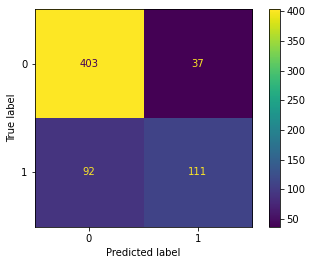

In [25]:
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [26]:
from sklearn.metrics import precision_recall_fscore_support
pd.DataFrame(precision_recall_fscore_support(test, predicted))

,0,1
0,0.814141,0.750000
1,0.915909,0.546798
2,0.862032,0.632479
3,440.000000,203.000000


- Доля правильно предсказанных пользователей тарифа 0 среди пользоватлей, отнесенных моделью к пользователям тарифа 0 составила  81%
- Доля правильно предсказанных пользователей тарифа 1 - 75% 
- Доля истинных пользователей тарифа 0 среди пользователей, отнесенных моделью к пользователям тарифа 0 - 92% 
- А у тарифа 1- всего 55%

**Вывод**

Наша модель не очень хорошо справляется с распознованием пользователей тарифа «Ультра» — 1, совершает достаточно много ложно отрицательных ошибок. С пользователями тарифа 0 - «Смарт» доля ошибок не значительна.

**Общий вывод**
- Предоставленные данные чистые и готовы к исследованиям
- Были исследованы модели Decision Tree Classifier, RandomForestClassifier и Logistic Regression;
- Наилучшую эффективность показала модель RandomForestClassifier  max_depth - 9, max_features- 'log2', min_samples_leaf- 1, min_samples_split- 6, n_estimators - 30;
- Accuracy модели RandomForestClassifier на тестовой выборке: 0.799
- Проверка на адекватность пройдена